# Shumovskaia Valentina

# Problem set 1 (100 pts)

## Important information

* Read [homework rules](../hw.pdf) carefully. <font color='red'>If you do not follow it you will likely be penalized.</font>


* We provide signatures of the functions for every coding task. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

## Problem 0 (Piazza) Your solution will not be graded unless this problem is solved!

You were invited to Piazza, where you can find [announcement](https://piazza.com/class/j9cp73agv3u3w4?cid=7) on the course project. In case you didn't get an invitation to your @skoltech.ru email from Piazza, ask TA to set you up there. 
* Register in Piazza with your @skoltech.ru email.
* Write a private post to TAs in Piazza describing your favorite math fact (not necessarily a difficult one).

In [1]:
#done https://piazza.com/class/j9cp73agv3u3w4?cid=28

## Problem 1 (Python demo) 40 pts
### Data preparation (10 pts)

* First of all download $\verb|.wav|$ file with starcraft sound from [here](TMaRdy00.wav). Load it in python and play using the following functions:

In [2]:
from scipy.linalg import toeplitz
import numpy as np
import math
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

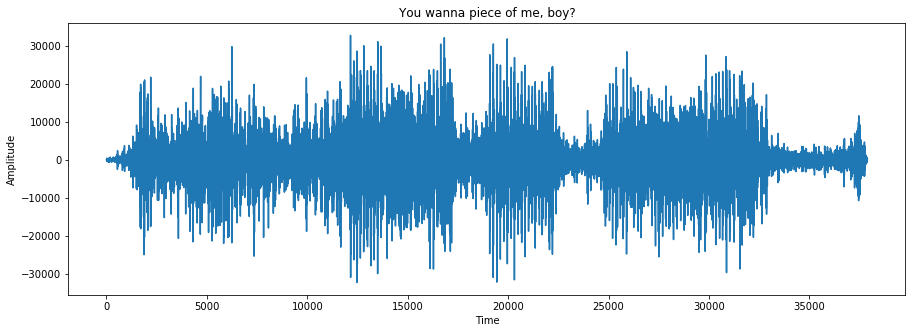

In [3]:
# reading
rate, audio = wav.read("TMaRdy00.wav")

# plotting
plt.figure(figsize=(15, 5))
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("You wanna piece of me, boy?")
plt.show()

# playing
Audio(audio, rate=rate)

Our next goal is to process this signal by multiplying it by a special type of matrix (convolution operation) that will smooth the signal. 

* Before processing this file let us estimate what size of matrix we can afford. Let $N$ be the size of the signal. Estimate analytically memory in megabytes required to store dense square matrix of size $N\times N$ to fit in your operation memory and print this number. Cut the signal so that you will not have swap (overflow of the operation memory). **Note:** Cut the signal by taking every p-th number in array: ```signal[::p]```. 

In [4]:
mem = audio.shape[0]**2*audio.itemsize/(1024**2) #size in Mb
print('Memory = ',mem, 'Mb')

Memory =  2738.0 Mb


In [5]:
#my operation memory size is 8 Gb => let's divide N by, say, 4 to fit it in my operation memory
mem_coef = 4
N = audio.shape[0]/mem_coef
print(N)

9472.0


In [6]:
audio = audio[::mem_coef]

* Write a function 
```python
def gen_toeplitz(N, alpha):    
    return T
```
that outputs matrix $T$: $$T_{ij} = \sqrt{\frac{\alpha}{\pi}}e^{-\alpha (i-j)^2}, \quad i,j=1,\dots,N$$ as numpy array. <font color='red'> Avoid using loops or lists! </font> The function [np.meshgrid](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html) will be helpful for this task.
**Note:** matrices that depend only on difference of indices: $T_{ij} \equiv T_{i-j}$ are called **Toeplitz**. Toeplitz matrix-by-vector multiplication is **convolution** since it can be written as $$y_i = \sum_{j=1}^N T_{i-j} x_j.$$ Convolutions can be computed faster than $\mathcal{O}(N^2)$ complexity using Fast Fourier transform (will be covered later in our course, no need to implement it here).

In [7]:
# INPUT: N - integer (positive), alpha - float (positive)
# OUTPUT: T - np.array (shape: NxN)

def gen_toeplitz(N, alpha): # 5 pts
    x = y = np.arange(1, N+1)
    xgrid, ygrid = np.meshgrid(x, y)
    T = math.sqrt(alpha/math.pi)*np.exp(-alpha*(xgrid-ygrid)**2)
    return T

### Convolution (10 pts)

* Write a function ```convolution``` (see below)
that takes the signal you want to convolve and multiply it by Toeplitz matrix $T$ (for matvec operations use @ symbol). Plot the first $100$ points of the result and the first $100$ points of your signal on the same figure. Do the same plots for $\alpha = \frac{1}{5}$, $\alpha = \frac{1}{100}$ using ```plt.subplots``` in matplotlib. Each subplot should contain first $100$ points of initial and convolved signals for some $\alpha$. Make sure that you got results that look like smoothed initial signal.

In [8]:
# INPUT: signal - np.array (shape: Nx1), N - int (positive), alpha - float (positive)
# OUTPUT: convolved_signal - np.array (shape: Nx1)

def convolution(signal, N, alpha): # 4 pts
    convolved_signal = (gen_toeplitz(N, alpha)) @ signal
    return convolved_signal

In [9]:
alpha_1 = 1/5
audio_conv_1 = convolution(audio, N, alpha_1)

alpha_2 = 1/100
audio_conv_2 = convolution(audio, N, alpha_2)

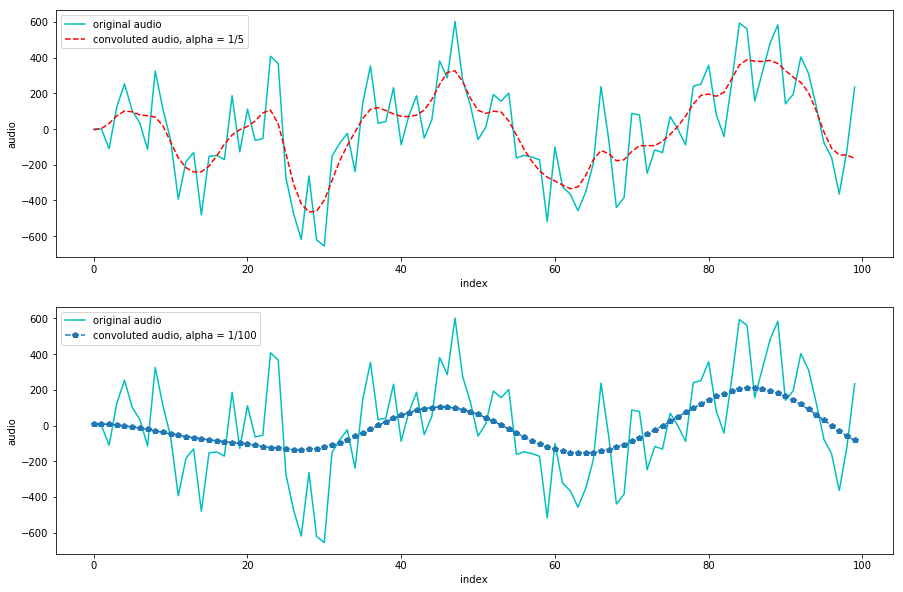

In [10]:
x = np.arange(0, 100, 1)

plt.figure(1, figsize=(15,10))
plt.subplot(211)
plt.xlabel('index')
plt.ylabel('audio')
plt.plot(x, audio[:100], 'c', label='original audio')
plt.plot(x, audio_conv_1[:100], 'r--', label='convoluted audio, alpha = 1/5')
plt.legend()


plt.subplot(212)
plt.xlabel('index')
plt.ylabel('audio')
plt.plot(x, audio[:100], 'c', label='original audio')
plt.plot(x, audio_conv_2[:100], 'p--', label='convoluted audio, alpha = 1/100')
plt.legend()

plt.show()

* Play the resulting signal. In order to do so you should also scale the frequency (rate), which is one of the inputs in `Audio`.  
Note that you cannot play a signal which is too small.

In [11]:
Audio(audio_conv_1, rate=rate/mem_coef)

In [12]:
Audio(audio_conv_2, rate=rate/mem_coef)

### Deconvolution (20 pts)

Given a convolved signal $y$ and an initial signal $x$ our goal now is to recover $x$ by solving the system
$$
    y = Tx.
$$
To do so we will run iterative process
$$
    x_{k+1} = x_{k} - \tau_k (Tx_k - y), \quad k=1,2,\dots
$$
starting from zero vector $x_0$. There are different ways how to define parameters $\tau_k$.
Different choices lead to different methods (e.g. Richardson iteration, Chebyshev iteration, etc.).
This topic will be covered in details later in our course.

To get some intuition why this process converges to the solution of $Tx=y$, we can consider the following. Let us note that if $x_k$ converges to some limit $x$, then so does $x_{k+1}$. Taking $k\to \infty$ we arrive at $x = x - \tau (Tx -  y)$ and hence $x$ is the solution of $Tx = y$. 

Another important point is that iterative process requires only matrix-vector porducts $Tx_k$ on each iteration instead of the whole matrix. In this problem we, however, work with the full matrix, but keep in mind, that convolution can be done efficiently without storing the whole matrix.

* For each $k$ choose paremeter $\tau_k$ such that the residual $r_{k+1}=Tx_{k+1} - y$ is minimal possible (*line search* with search direction $r_k$):
$$
    \|Tx_{k+1} - y\|_2 \to \min_{\tau_k}
$$
found analytically. The answer to this bullet is a derivation of $\tau_k$. The parameter $\tau_k$ should be expressed in terms of residuals $r_k = T x_k - y$.

In [13]:
def tau_k(T, r_k):
    return np.dot(r_k, T @ r_k)/np.dot(T @ r_k, T @ r_k)

* Write a function ```iterative```
that outputs accuracy –– a numpy array of relative errors $\big\{\frac{\|x_{k+1} - x\|_2}{\|x\|_2}\big\}$ after ```num_iter``` iterations using $\tau_k$ from the previous task. Set ```num_iter=1000```, ```x=s[::20]``` and do a convergence plot for $\alpha = \frac{1}{2}$ and $\alpha = \frac{1}{5}$. **Note:** The only loop you are allowed to use here is a loop for $k$.

In [14]:
# INPUT:  N - int (positive), alpha - float (positive), num_iter - integer (positive), y - np.array (shape: Nx1, convolved signal), s - np.array (shape: Nx1, original signal)
# OUTPUT: rel_error - np.array size (num_iter x 1)

def iterative(N, num_iter, y, s, alpha): # 10 pts
    T = gen_toeplitz(N, alpha)
    x_0 = np.zeros(y.shape)
    rel_error = np.zeros(num_iter)
    
    x_k = x_0
    for k in range(num_iter):
        r_k = T @ x_k - y
        t_k = tau_k(T, r_k)
        x_k = x_k - t_k*r_k
        rel_error[k] = np.linalg.norm(x_k-s,2)/np.linalg.norm(s,2)
    return rel_error

In [15]:
rate, audio = wav.read("TMaRdy00.wav")

audio = audio[::20]
alpha_1 = 1/2
alpha_2 = 1/5
N = int(audio.shape[0])
convoluted_audio_1 = convolution(audio, N, alpha_1)
convoluted_audio_2 = convolution(audio, N, alpha_2)

In [16]:
relative_error_1 = iterative(N, num_iter=1000, y=convoluted_audio_1, s=audio, alpha=alpha_1)
relative_error_2 = iterative(N, num_iter=1000, y=convoluted_audio_2, s=audio, alpha=alpha_2)

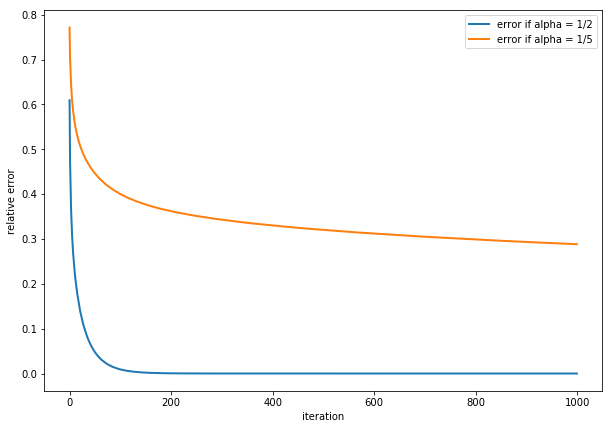

In [17]:
plt.figure(figsize=(10,7))
plt.plot(relative_error_1, label='error if alpha = 1/2', lw=2)
plt.plot(relative_error_2, label='error if alpha = 1/5', lw=2)
plt.ylabel("relative error")
plt.xlabel("iteration")
plt.legend()
plt.show()

* Set ```x=s[::20]```, ```num_iter=1000``` and $\alpha=\frac{1}{5}$. Explain what happens with the convergence if you add small random noise of amplitude $10^{-3}\max(x)$  to $y$. The answer to this question should be an explanation supported by plots and/or tables.

In [18]:
noise = np.random.uniform(low=-0.001*max(audio), high=0.001*max(audio),size=N)
alpha = 1/5
convoluted_audio = convolution(audio, N, alpha)
relative_error = iterative(N, num_iter=1000, y=convoluted_audio, s=audio, alpha=alpha)
relative_error_noise = iterative(N, num_iter=1000, y=convoluted_audio + noise, s=audio, alpha=alpha)

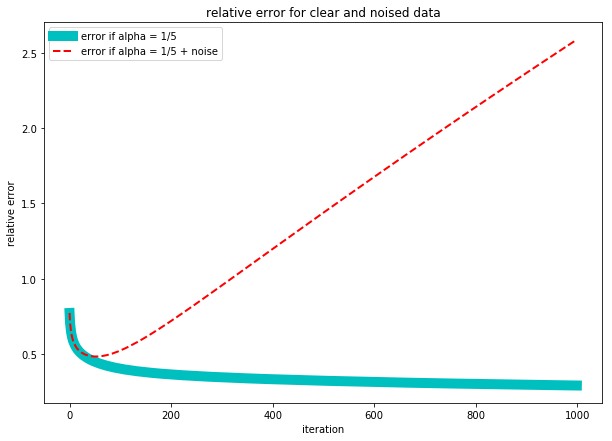

In [19]:
plt.figure(figsize=(10,7))
plt.plot(relative_error, label='error if alpha = 1/5', lw=10, c='c')
plt.plot(relative_error_noise, label='error if alpha = 1/5 + noise', lw=2, ls='--', c='r')
plt.ylabel('relative error')
plt.xlabel('iteration')
plt.legend()
plt.title('relative error for clear and noised data')
plt.show()

Relative error grows.

When we add the noise, we solve new system $y + noise = Tx$, thus, the iterative process turns into $x_{k+1} = x_k - \tau_k(Tx_k - y - noise) <=> x_{k+1} - x_k = - \tau_k(Tx_k - y - noise)$ and the relative error grows with $k$.

## Problem 2 (Theoretical tasks)  30 pts


_1._ (5 pts) Prove that $\|Ux\|_2 = \|x\|_2$ for any $x\in\mathbb{C}^n$ iff $U$ is unitary.
  
  
_2._ (5 pts) Prove that an operator norm is a matrix norm, i.e. it is a norm on the vector space of matrices and satisfies the submultiplicative property.


_3._ (5 pts) Prove that $\|A\|_2 = \sigma_1(A)$ and $\|A\|_F = \sqrt{\sigma_1^2(A) + \dots + \sigma_r^2(A)}$ using unitary invariance of $\|\cdot\|_2$ and $\|\cdot\|_F$.


_4._ (5 pts) Prove that $\|AB\|_F \leq \|A\|_2 \|B\|_F \leq \|A\|_F \|B\|_F$.


_5._ (5 pts) Find a gradient of the generalized Rayleigh quotient $R(x) = \dfrac{(x, Ax)}{(x, Bx)}$, $A=A^*$, $B>0$. How is zero gradient condition connected to the classical eigenvalue problem if $B=I$, where $I$ is the identity matrix.

_6._ (5 pts) Alternating optimization in the task of approximation of a matrix $A\in\mathbb{R}^{n\times m}$ with its rank-$r$ approximation $A_r \equiv UV^\top$, $U\in\mathbb{R}^{n\times r}$, $V\in\mathbb{R}^{m\times r}$ can be formulated as sequential minimization by $U$ and by $V$ of the functional $F(U,V)$: 

$$
    F(U,V) = \frac 12 \|A - UV^\top\|_F^2 + \frac{\lambda_U}2 \|U\|_F^2 + \frac{\lambda_V}2 \|V\|_F^2,
$$

where $\lambda_U,\lambda_V$ are regularization constants. 
Find gradient of $F(U,V)$ w.r.t. $U$ and $V$.

### Solutions

##### 1 task

1. Let $U$ be an unitary operator. Consider $\forall x \in \mathbb{C}^n$. Then $\|Ux\|_2^2 = \langle Ux, Ux\rangle = \langle U^*Ux,x \rangle = \langle x, x\rangle = \|x\|_2^2$.

2. $\forall x \in \mathbb{C}$ let $\|x\|_2 = \|Ux\|_2$. $\|Ux\|_2^2 = \langle Ux,Ux \rangle = \langle U^*Ux, x\rangle$ and $\|x\|^2_2 = \langle x, x \rangle$. Then $\langle U^*Ux, x\rangle = \langle x, x \rangle$ holds, which means (as $x$ is arbitrary) that $U^*U = I$. Hence, $U$ is unitary.

##### 2 task

First, let us denote vector norm $\|A\| = \|A\|_{*,**} = \sup_{x \neq 0} \frac{\|Ax\|_*}{\|x\|_{**}}$. Let's prove matrix norms axioms. 

_1._ $\|A\| \geq 0$?

It's true since $\|Ax\|_* \geq 0$ and $\|x\|_{**} \geq 0$ 

$\|A\| = 0 => A = O?$

$\|A\| = 0  => \forall x \in \mathbb{C}$ holds $\|Ax\|_* = 0 => A = O.$

_2._ $\|\alpha A\| = |\alpha|\|A\|?$

$\|\alpha A\| = \sup_{x \neq 0} \frac{\|\alpha Ax\|_*}{\|x\|_{**}} = \sup_{x \neq 0} \frac{|\alpha|\|Ax\|_*}{\|x\|_{**}} = |\alpha|\sup_{x \neq 0} \frac{\|Ax\|_*}{\|x\|_{**}} = |\alpha|\|A\|$. 

_3._ $\|A + B\| \leq \|A\| + \|B\|?$

$\|A + B\| = \sup_{x \neq 0} \frac{\|(A+B)x\|_*}{\|x\|_{**}} \leq \sup_{x \neq 0} \frac{\|Ax\|_* + \|Bx\|_*}{\|x\|_{**}} = \sup_{x \neq 0} \frac{\|Ax\|_*}{\|x\|}_{**} + \sup_{x \neq 0} \frac{\|Bx\|_*}{\|x\|}_{**} = \|A\| + \|B\|$.

_4._ $\|AB\| \leq \|A\|\|B\|?$

Fix $\forall x \in \mathbb{C}$. $\|AB\| = \sup_{x \neq 0} \frac{\|ABx\|_*}{\|x\|_{**}} = \|ABx_0\|_*$, where $x_0$ such that $\|x_0\|_{**} = 1$. $\|ABx_0\|_* \leq \|A\|\cdot\|Bx_0\|_* \leq \|A\| \|B\| \|x_0\|_{**} = \|A\|\|B\|.$

Thus, operator norm is a matrix norm.

##### 3 task

_1._ $\|A\|_2 = \sup_{x \neq 0}\frac{\|Ax\|_2}{\|x\|_2} = \sup_{x \neq 0}\frac{\sqrt{\langle Ax, Ax\rangle}}{\|x\|_2} = \sup_{x \neq 0}\frac{\sqrt{\langle A^*Ax, x\rangle}}{\|x\|_2} = \sup_{x:\|x\|_2 = 1}\sqrt{\langle A^*Ax,x \rangle} = \sup_{\|x\|_2=1}\sqrt{\langle U\Sigma^* \Sigma U^* x, x \rangle} = \sup_{\|x\|_2=1}\sqrt{\langle \Sigma^*\Sigma U^*x,U^*x \rangle} = \sup_{\|x\|_2=1}\sqrt{\langle \Sigma^*\Sigma x, x \rangle} =  \lambda_{max}(A^*A) = \sigma_1(A),$ where $U, \Sigma$ are from eigen decomposition of $A = U\Sigma V$, also we used the following property: $\|U^*x\|_2 = \|x\|_2$, if $U$ is unitary.

_2._ $\|A\|_F = \big(\sum_{i,j}|a_{ij}|^2 \big)^{1/2} = \sqrt{a_{11}^2 + \dots a_{1n}^2 + \dots + a_{n1}^2 + \dots + a_{nn}^2} = \sqrt{\textrm{Tr} A^*A} = \sqrt{\textrm{Tr}(U\Sigma^*\Sigma U^*)}$, where $U, \Sigma$ are from eigen decomposition of $A = U\Sigma V$. $\sqrt{\textrm{Tr}(U\Sigma^*\Sigma U^*)} = \sqrt{\textrm{Tr}(\Sigma^*\Sigma)} = \sqrt{\sigma_1^2 + \dots + \sigma_r^2}.$

##### 4 task

_1._ $\|AB\|_F \leq \|A\|_2\|B\|_F?$

$\|AB\|_F = \sqrt{\sigma_1^2(AB) + \dots + \sigma_r^2(AB)} = \sqrt{\textrm{Tr}((AB)^*AB)} = \sqrt{\textrm{Tr}(B^*A^*AB)} = \sqrt{\textrm{Tr}(BB^*A^*A)} \leq \sqrt{\textrm{Tr}(BB^*)\textrm{Tr}(A^*A)} \leq \|A\|_2\|B\|_2$. We can see (from problem 3) that $\|B\|_2 \leq \|B\|_F$, then, $\|A\|_2\|B\|_2 \leq \|A\|_2\|B\|_F.$ Hense, we proved the statement.

_2._ $\|A\|_2\|B\|_F \leq \|A\|_F\|B\|_F?$

We can see (from problem 3) that $\|A\|_2 \leq \|A\|_F$ and above we showed that $\|AB\|_F \leq \|A\|_2\|B\|_F$. Obviously, we're getting that $\|A\|_2\|B\|_F \leq \|A\|_F\|B\|_F$. 

##### 5 task

_1._
$$
\nabla_k R = \frac{2\sum_{i=1}^na_{ki}x_i\cdot\langle Bx,x \rangle - 2\sum_{i=1}^nb_{ki}x_i\cdot\langle Ax,x \rangle}{\langle Bx,x \rangle^2}
$$
$$
\nabla R = 2\frac{Ax\langle Bx,x \rangle - Bx\langle Ax,x \rangle}{\langle Bx,x\rangle^2}
$$

_2._ Consider $B = I.$ If $x,\lambda$ -- eigenvector and corresponding eigenvalue of $A$ then $\nabla R = 2\frac{Ax\langle x,x \rangle - x\langle Ax,x \rangle}{\langle x,x\rangle^2} = 2\frac{\lambda x\langle x,x \rangle - x\langle \lambda x,x \rangle}{\langle x,x\rangle^2} = 2\frac{\lambda x\langle x,x \rangle - \lambda x\langle x,x \rangle}{\langle x,x\rangle^2} = 0.$

##### 6 task

$\nabla_U \|A - UV^T\|_F^2 = \nabla_U tr(A-UV^T)^T(A-UV^T) = -\nabla_U tr(A^TUV^T) -\nabla_U tr(VU^TA) + \nabla_Utr(VU^TUV^T) = -AV -AV +2UV^TV = -2AV + 2UV^TV,$

$\nabla_U \|U\|_F^2 = 2U,$

$\nabla_U \|V\|_F^2 = O,$

$=> \nabla_U F(U,V) = -AV + UV^TV + \lambda_UU.$

$\nabla_V \|A - UV^T\|_F^2 = \nabla_V tr(A-UV^T)^T(A-UV^T) = -\nabla_V tr(A^TUV^T) -\nabla_V tr(VU^TA) + \nabla_Vtr(VU^TUV^T) = -A^TU - A^TU +2VU^TV = -2A^TU + 2VU^TU,$

$\nabla_V \|U\|_F^2 = O,$

$\nabla_V \|V\|_F^2 = 2V,$

$=> \nabla_V F(U,V) = -A^TU + VU^TU + \lambda_VV.$

$\nabla F(U,V) = \big(\nabla_UF(U,V), \nabla_VF(U,V)\big).$

## Problem 3 (Strassen algorithm) 10 pts

1. What is the exact complexity of naive matrix-matrix multiplication? What is the complexity of Strassen algorithm? Can complexity of matrix-matrix multiplication be asymptotically smaller than $\mathcal{O}(n^2)$? Why?

2. It's a good idea not to do recursion to the bottom level in the Strassen algorithm. Let us check if only several   levels of the recursion help to reduce the constant outside $n^3$. Find analytically constant outside $n^3$ after $3$ levels of recursion in the Strassen algorithm. Compare it with the constant in the naive multiplication. **Note:** Assume that additions and multiplications in computer have the same computational cost.

#### Solutions

#### 1
Complexity of naive matrix-matrix multiplication is $2n^3 = \mathcal{O}(n^3)$, because for each element we need to do $n$ additions and $n$ multiplications. Strassen gives $\mathcal{O}(n^{2.807\dots})$. A quest for $\mathcal{O}(n^2)$ matrix-by-matrix multiplication algorithm is not yet done. The world record is $\mathcal{O}(n^{2.37\dots})$, but with big constant, not practical.

#### 2
 
Let's compute number of additions for 3 level of recursion in the Strassen algorithm:

$$
A_\text{strassen_3}(n) = 7 A_\text{strassen_2}\left( \frac{n}{2} \right) + 18 \left( \frac{n}{2} \right)^2 = 7 \left(7 A_\text{strassen_1}\left( \frac{n}{4} \right) + 18 \left( \frac{n}{4} \right)^2 \right) + 18 \left( \frac{n}{2} \right)^2 =
7 \left(7 \left(7 A_\text{naive}\left( \frac{n}{8} \right) + 18 \left( \frac{n}{8} \right)^2 \right) + 18 \left( \frac{n}{4} \right)^2 \right) + 18 \left( \frac{n}{2} \right)^2 = 
7 \left(7 \left(7 \left( \frac{n}{8} \right)^3 + 18 \left( \frac{n}{8} \right)^2 \right) + 18 \left( \frac{n}{4} \right)^2 \right) + 18 \left( \frac{n}{2} \right)^2 =
0.669921875n^3 + 26.15625
$$

Let's compute number of multiplications for 3 level of recursion in the Strassen algorithm:

$$
M_\text{strassen_3}(n) = 7 M_\text{strassen_2}\left(\frac{n}{2} \right) = 7^2 M_\text{strassen_1}\left(\frac{n}{4} \right) = 7^3 M_\text{naive}\left(\frac{n}{8} \right) = 7^3 \left(\frac{n}{8} \right)^3 = 0.669921875n^3.
$$

Thus, the total complexity is $0.669921875n^3 + 26.15625 + 0.669921875n^3 = 1.33984375n^3 + 26.15625.$

Complexity for naive algorithm is $2n^3$

We can do 3 level of recursion if $n>8$. $1.33984375n^3 + 26.15625 < 2n^3$ holds for $n>8$, so Strassen algorithm with 3 level of recursion works faster.

## Problem 4 (SVD)  20 pts

In [21]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy as sp
import scipy.ndimage

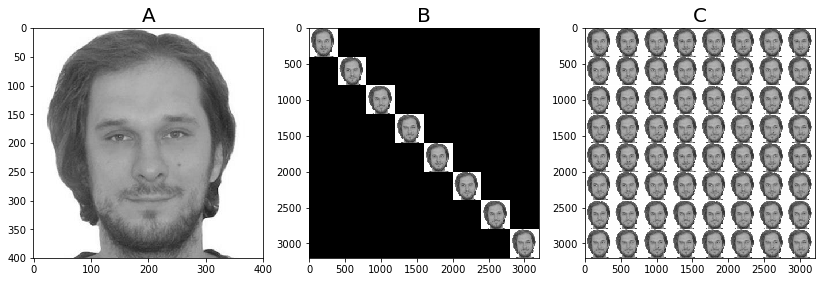

In [22]:
img = np.array(Image.open('ivan.png'), dtype=np.float64)
img_block = np.array(Image.open('ivan_block.png'), dtype=np.float64)
img_diag_block = np.array(Image.open('ivan_diag_block.png'), dtype=np.float64)
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.title('A', fontsize=20)
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(132)
plt.title('B', fontsize=20)
plt.imshow(img_diag_block, cmap=plt.cm.gray)
plt.subplot(133)
plt.title('C', fontsize=20)
plt.imshow(img_block, cmap=plt.cm.gray)
plt.show()

### Part A (10 pts)

1. Obtain the singular values of Ivan image **A** using `np.linalg.svd` and plot them. Do not forget to use logarithmic scale.

2. Why is the exact rank of **A** is not equal to the size of the figure?

3. Create a function ```approximate``` that takes an image matrix $M$ and a relative accuracy $\epsilon$ as an input and returns an approximated image matrix $M_\epsilon$ such that $\|M - M_\epsilon\|_F / \|M\|_F \leq \epsilon$, and   rank$(M_\epsilon)$. See how the function ```approximate``` must look like below.

4. Plot $M_\epsilon$ (for image **A**). Estimate for which accuracy value $\epsilon$ image $M_\epsilon$ begins to "look like" $M$. Note that, eventually, pixel-wise proximity is not a good metric for image similarity when doing low-rank approximation.

5. Plot $M_\epsilon$ (for image **A**) such that $rank(M_\epsilon) = 5, 20, 50$ using ```plt.subplots```. Note that for even relatively small ranks  image is well-recognizable.

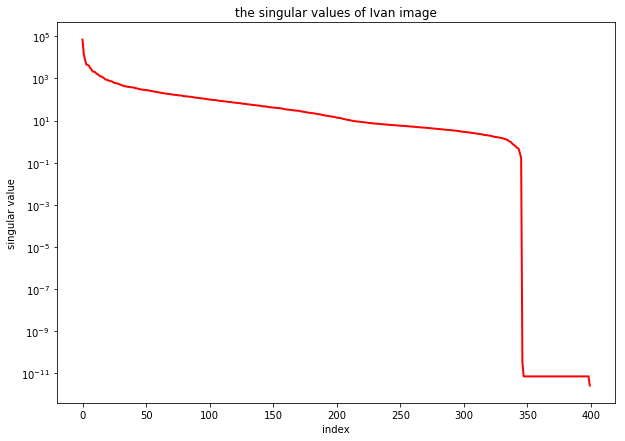

In [23]:
#1

A = img

U, s, V = np.linalg.svd(A)

plt.figure(figsize=(10,7))
plt.semilogy(s, c='r', lw=2) #ylogscaling
plt.ylabel('singular value')
plt.xlabel('index')
plt.title('the singular values of Ivan image')
plt.show()

In [24]:
#2

Why is the exact rank of $A$ is not equal to the size of the figure? Because there are linear independent columns. To be specific, there are equal columns (white space in the left and in the right parts of image).

In [25]:
#3

I will use this property:

computation of the best rank-$r$ approximation is equivalent to setting $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$. The error 

$$
   \min_{A_r} \Vert A - A_r \Vert_2 = \sigma_{r+1}, \quad \min_{A_r} \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2.}
$$

In [26]:
def approximate(img, eps): # 5 pts out of 10 pts
    U, s, V = np.linalg.svd(img)
    cumsum = np.square(s[::-1])
    cumsum = cumsum.cumsum()
    cumsum = np.sqrt(cumsum)
    
    M_F_eps = np.linalg.norm(img, 'fro') * eps
    for k in range(s.shape[0]):
        if cumsum[k] > M_F_eps: break
    s_appr = s
    s_appr[s.shape[0]-k:] = 0
    S_appr = np.diag(s_appr)
    img_appr = U @ S_appr @ V
    eps_rank = np.linalg.matrix_rank(img_appr)
    # your code here
    return img_appr, eps_rank

In [27]:
img_, rank_ = approximate(img, 0.009)
rank_

89

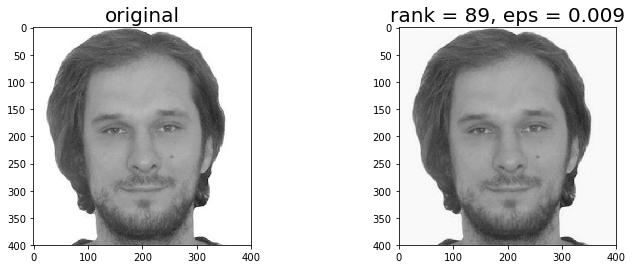

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('original', fontsize=20)
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(122)
plt.title('rank = 89, eps = 0.009', fontsize=20)
plt.imshow(img_, cmap=plt.cm.gray)
plt.show()

In [29]:
#5

In [30]:
img_5, rank_5 = approximate(A, 0.12)
rank_5

5

In [31]:
img_20, rank_20 = approximate(A, 0.043)
rank_20

20

In [32]:
img_50, rank_50 = approximate(A, 0.019)
rank_50

50

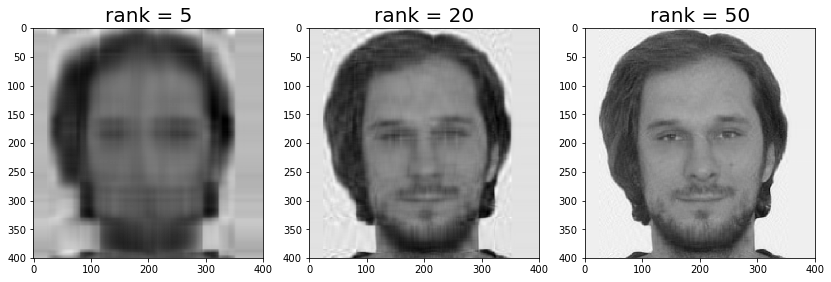

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.title('rank = 5', fontsize=20)
plt.imshow(img_5, cmap=plt.cm.gray)
plt.subplot(132)
plt.title('rank = 20', fontsize=20)
plt.imshow(img_20, cmap=plt.cm.gray)
plt.subplot(133)
plt.title('rank = 50', fontsize=20)
plt.imshow(img_50, cmap=plt.cm.gray)
plt.show()

### Part B (10 pts)

1. Plot singular values for Ivan images **B** and **C** in one figure. Again, do not forget to use logarithmic scale! <br>

2. Derive analytically ranks of **B** and **C** from the rank of **A**.

In [34]:
C = img_block
B = img_diag_block

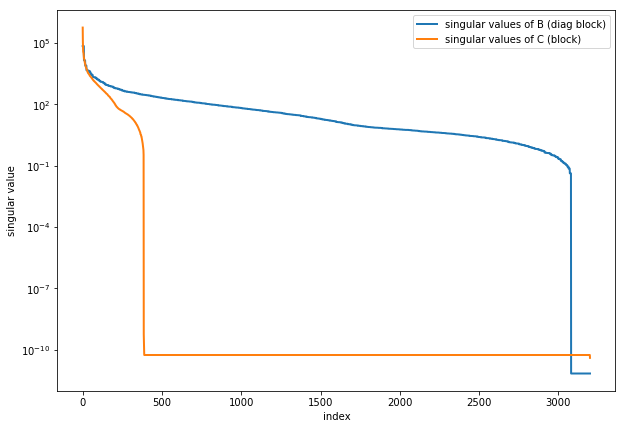

In [35]:
s_B = np.linalg.svd(B)[1]
s_C = np.linalg.svd(C)[1]
plt.figure(figsize=(10,7))
plt.semilogy(s_B, lw=2, label='singular values of B (diag block)')
plt.semilogy(s_C, lw=2, label='singular values of C (block)')
plt.ylabel('singular value')
plt.xlabel('index')
plt.legend()
plt.show()

In [36]:
rank_A = np.linalg.matrix_rank(A)

print(rank_A)

346


$$rg(B) = rg
\begin{pmatrix}
A & I & \dots & I \\
I & A & \dots & I \\
\dots & \dots & \dots & \dots \\
I & I & \dots & A \\
\end{pmatrix} = 8*rg(A) = 2768.
$$
$$
rg(C) = rg
\begin{pmatrix}
A & A & \dots & A \\
A & A & \dots & A \\
\dots & \dots & \dots & \dots \\
A & A & \dots & A \\
\end{pmatrix} = 
\begin{pmatrix}
A & A & \dots & A \\
O & O & \dots & O \\
\dots & \dots & \dots & \dots \\
O & O & \dots & O \\
\end{pmatrix} = rg(A) = 346.
$$

## Problem 5 (Bonus)

1. The norm is called absolute if $\|x\|=\| \lvert x \lvert \|$ holds for any vector $x$, where $x=(x_1,\dots,x_n)^T$ and $\lvert x \lvert = (\lvert x_1 \lvert,\dots, \lvert x_n \lvert)^T$. Give an example of a norm which is not absolute.

2. Write a function ```ranks_HOSVD(A, eps)```
that calculates Tucker ranks of a d-dimensional tensor $A$ using High-Order SVD (HOSVD) algorithm, where ```eps``` is the relative accuracy in the Frobenius norm between the approximated and the initial tensors. Details can be found [here](http://ca.sandia.gov/~tgkolda/pubs/pubfiles/TensorReview.pdf) on Figure 4.3.
```python
def ranks_HOSVD(A, eps):
      return r #r should be a tuple of ranks r = (r1, r2, ..., rd)
```
3. Find Hessian of  $f(x_1,\dots,x_n) = \log \left( \displaystyle{\sum_{i=1}^n} e^{x_i} \right)$ and check if it is positive definite.

In [37]:
#1

I claim that $p(x) = |x_1| + \sum_{i=2}^n|x_i-x_1|$ is a norm on $\mathbb{R}^n$ over $\mathbb{R}$ , where $x = (x_1,\dots,x_n)^T.$

_1._ $p(x) = 0 => x = (0,\dots,0)?$

$p(x) = 0 => |x_1| + |x_2-x_1| + \dots + |x_n - x_1| = 0 => x_1 = 0, x_2-x_1 = 0, \dots, x_n-x_1=0 => x_1 = 0, \dots, x_n = 0 => x = (0,\dots,0).$

_2._ $\forall x, y \in \mathbb{R}^n => p(x+y) \leq p(x) + p(y)?$

$p(x+y) = |x_1 + y_1| + \sum_{i=2}^n|x_i+y_i-x_1-y_1| \leq |x_1| + \sum_{i=2}^n|x_i-x_1| + |y_1| + \sum_{i=2}^n|y_i-y_1| = p(x) + p(y).$

_3._ $\forall \alpha \in \mathbb{R}, \forall x \in \mathbb{R}^n => p(\alpha x) = |\alpha|p(x)?$

$p(\alpha x) = |\alpha x_1| + \sum_{i=2}^n|\alpha (x_i - x_i)| = |\alpha|(|x_1| + \sum_{i=2}^n|x_i-x_1|) = |\alpha|p(x).$

_4._ $p(x) \geq 0?$

$p(x) \geq 0$ since it is a sum of absolute values.

Thus, $p(x)$ is a norm on $\mathbb{R}^n$ over $\mathbb{R}$. 

Consider $x = (1,-1,\dots,-1)$. 

$p(x) = 1 + 2(n-1), p(|x|) = 1 + 0 = 1$. So, if $n>2$, then $p(x)$ is not an absolute norm.